In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000)   #設定最大能顯示1000columns
from sklearn import tree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder       #轉字串為數字
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
FirstData = pd.read_csv("Cancer.csv", thousands=",")    # 匯入csv檔，將千分位記號捨去
FirstData = FirstData.replace('?', np.nan)              # 將 ? 號值改成NaN
FirstData.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cancer
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0


In [3]:
FirstData.isnull().sum()         # 計算個欄位空值總數

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [4]:
FirstData = FirstData._convert(numeric=True)   # 轉換欄位值型態
FirstData.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [5]:
FirstData = FirstData.drop('STDs: Time since first diagnosis',axis=1)       
FirstData = FirstData.drop('STDs: Time since last diagnosis',axis=1)
FirstData = FirstData.drop('STDs:cervical condylomatosis',axis=1)
FirstData = FirstData.drop('STDs:vaginal condylomatosis',axis=1)                # 根據kaggle的統計資料，刪除過多 NaN 值的項
FirstData = FirstData.drop('STDs:pelvic inflammatory disease',axis=1)
FirstData = FirstData.drop('STDs:genital herpes',axis=1)
FirstData = FirstData.drop('STDs:molluscum contagiosum',axis=1)
FirstData = FirstData.drop('STDs:AIDS',axis=1)
FirstData = FirstData.drop('STDs:Hepatitis B',axis=1)
FirstData = FirstData.drop('STDs:HPV',axis=1)
FirstData = FirstData.drop('STDs: Number of diagnosis',axis=1)

FirstData.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [6]:
def convert_median(name0 = '') : 
    FirstData[name0] = FirstData[name0].fillna(FirstData[name0].median())            # 補缺失值: 平均

convert_median('Number of sexual partners')
convert_median('First sexual intercourse')
convert_median('Num of pregnancies')
convert_median('Smokes (years)')
convert_median('Smokes (packs/year)')
convert_median('Hormonal Contraceptives (years)')
convert_median('STDs (number)')
convert_median('STDs:condylomatosis')
convert_median('STDs:vulvo-perineal condylomatosis')
convert_median('STDs:syphilis')
convert_median('STDs:HIV')

def convert_0_1( name1 = '', num1 = 0 ) : 
    FirstData[name1] = FirstData[name1].fillna(0)           # 補缺失值: 補0 or 1 

convert_0_1('IUD', 0)
convert_0_1('IUD (years)', 0)
convert_0_1('Smokes', 1)
convert_0_1('STDs', 1)
convert_0_1('Hormonal Contraceptives', 1)

FirstData = FirstData.drop('Dx',axis=1)       # 刪除 Dx 欄位

FirstData.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy,Cancer
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [7]:
for i in range(len(FirstData)) : 
    if FirstData['Hinselmann'][i] + FirstData['Schiller'][i] + FirstData['Citology'][i] + FirstData['Biopsy'][i] > 1 :
       FirstData['Cancer'][i] = 1 

    else :                                                                    # 4 種目標函數，只要符合兩種檢查欄位是陽性的，便是確診，Cancer是我自己多弄出的欄位
       FirstData['Cancer'][i] = FirstData['Dx:Cancer'][i]                           

    i = i + 1 

FirstData.head()   

C:\Users\user\AppData\Local\Temp\ipykernel_23312\3686318434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FirstData['Cancer'][i] = FirstData['Dx:Cancer'][i]
C:\Users\user\AppData\Local\Temp\ipykernel_23312\3686318434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FirstData['Cancer'][i] = 1


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy,Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


Smokes :  123.0
Hormonal Contraceptives :  481.0
IUD :  83.0
STDs:condylomatosis :  44.0
STDs:vulvo-perineal condylomatosis :  43.0
STDs:syphilis :  18.0
STDs:HIV :  18.0
Dx:CIN :  9.0
Dx:HPV :  18.0
STDs :  79.0


<BarContainer object of 10 artists>

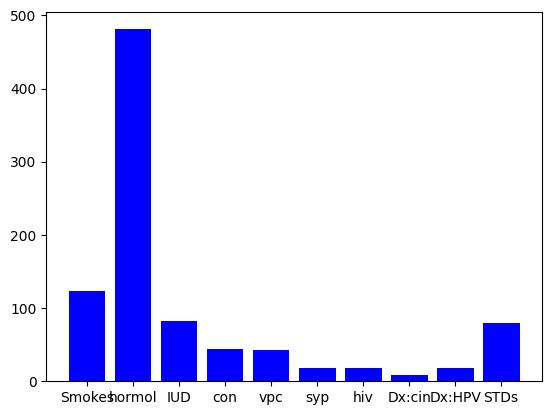

In [8]:
numOfsmoke = 0 
numOfhormol = 0
numOfIUD = 0 
numOfcon = 0 
numOfvpc = 0 
numOfsyp = 0 
numOfhiv = 0   
                                    ## 計算離散型風險因子陽性數量
dx0 = 0 
dx1 = 0 
dxcancer = 0 
dxstd = 0 
num = 0.0
name = "aaa"

def TheWhole(name='', num = 0.0) : 
  for i in range(len(FirstData)) : 
    if FirstData[name][i] == 1 : 
       num = num + 1.0
    i = i + 1 

  print(name,': ',num)

TheWhole("Smokes",numOfsmoke)                         
TheWhole('Hormonal Contraceptives',numOfhormol)
TheWhole('IUD',numOfIUD)
TheWhole('STDs:condylomatosis',numOfcon)
TheWhole('STDs:vulvo-perineal condylomatosis',numOfvpc)
TheWhole('STDs:syphilis',numOfsyp)
TheWhole('STDs:HIV',numOfhiv)
TheWhole('Dx:CIN',dx0)
TheWhole('Dx:HPV',dx1)
TheWhole('STDs',dxstd)

x = ['Smokes','hormol','IUD','con','vpc','syp','hiv','Dx:cin','Dx:HPV','STDs']      # 各種離散( 0,1 )型陽性統計圖 
color = ['b','b','b','b','b','b','b','b','b','b']
h = [123,481,83,44,43,18,18,9,18,79]
plt.bar(x,h,color = color)

<AxesSubplot: xlabel='STDs (number)', ylabel='count'>

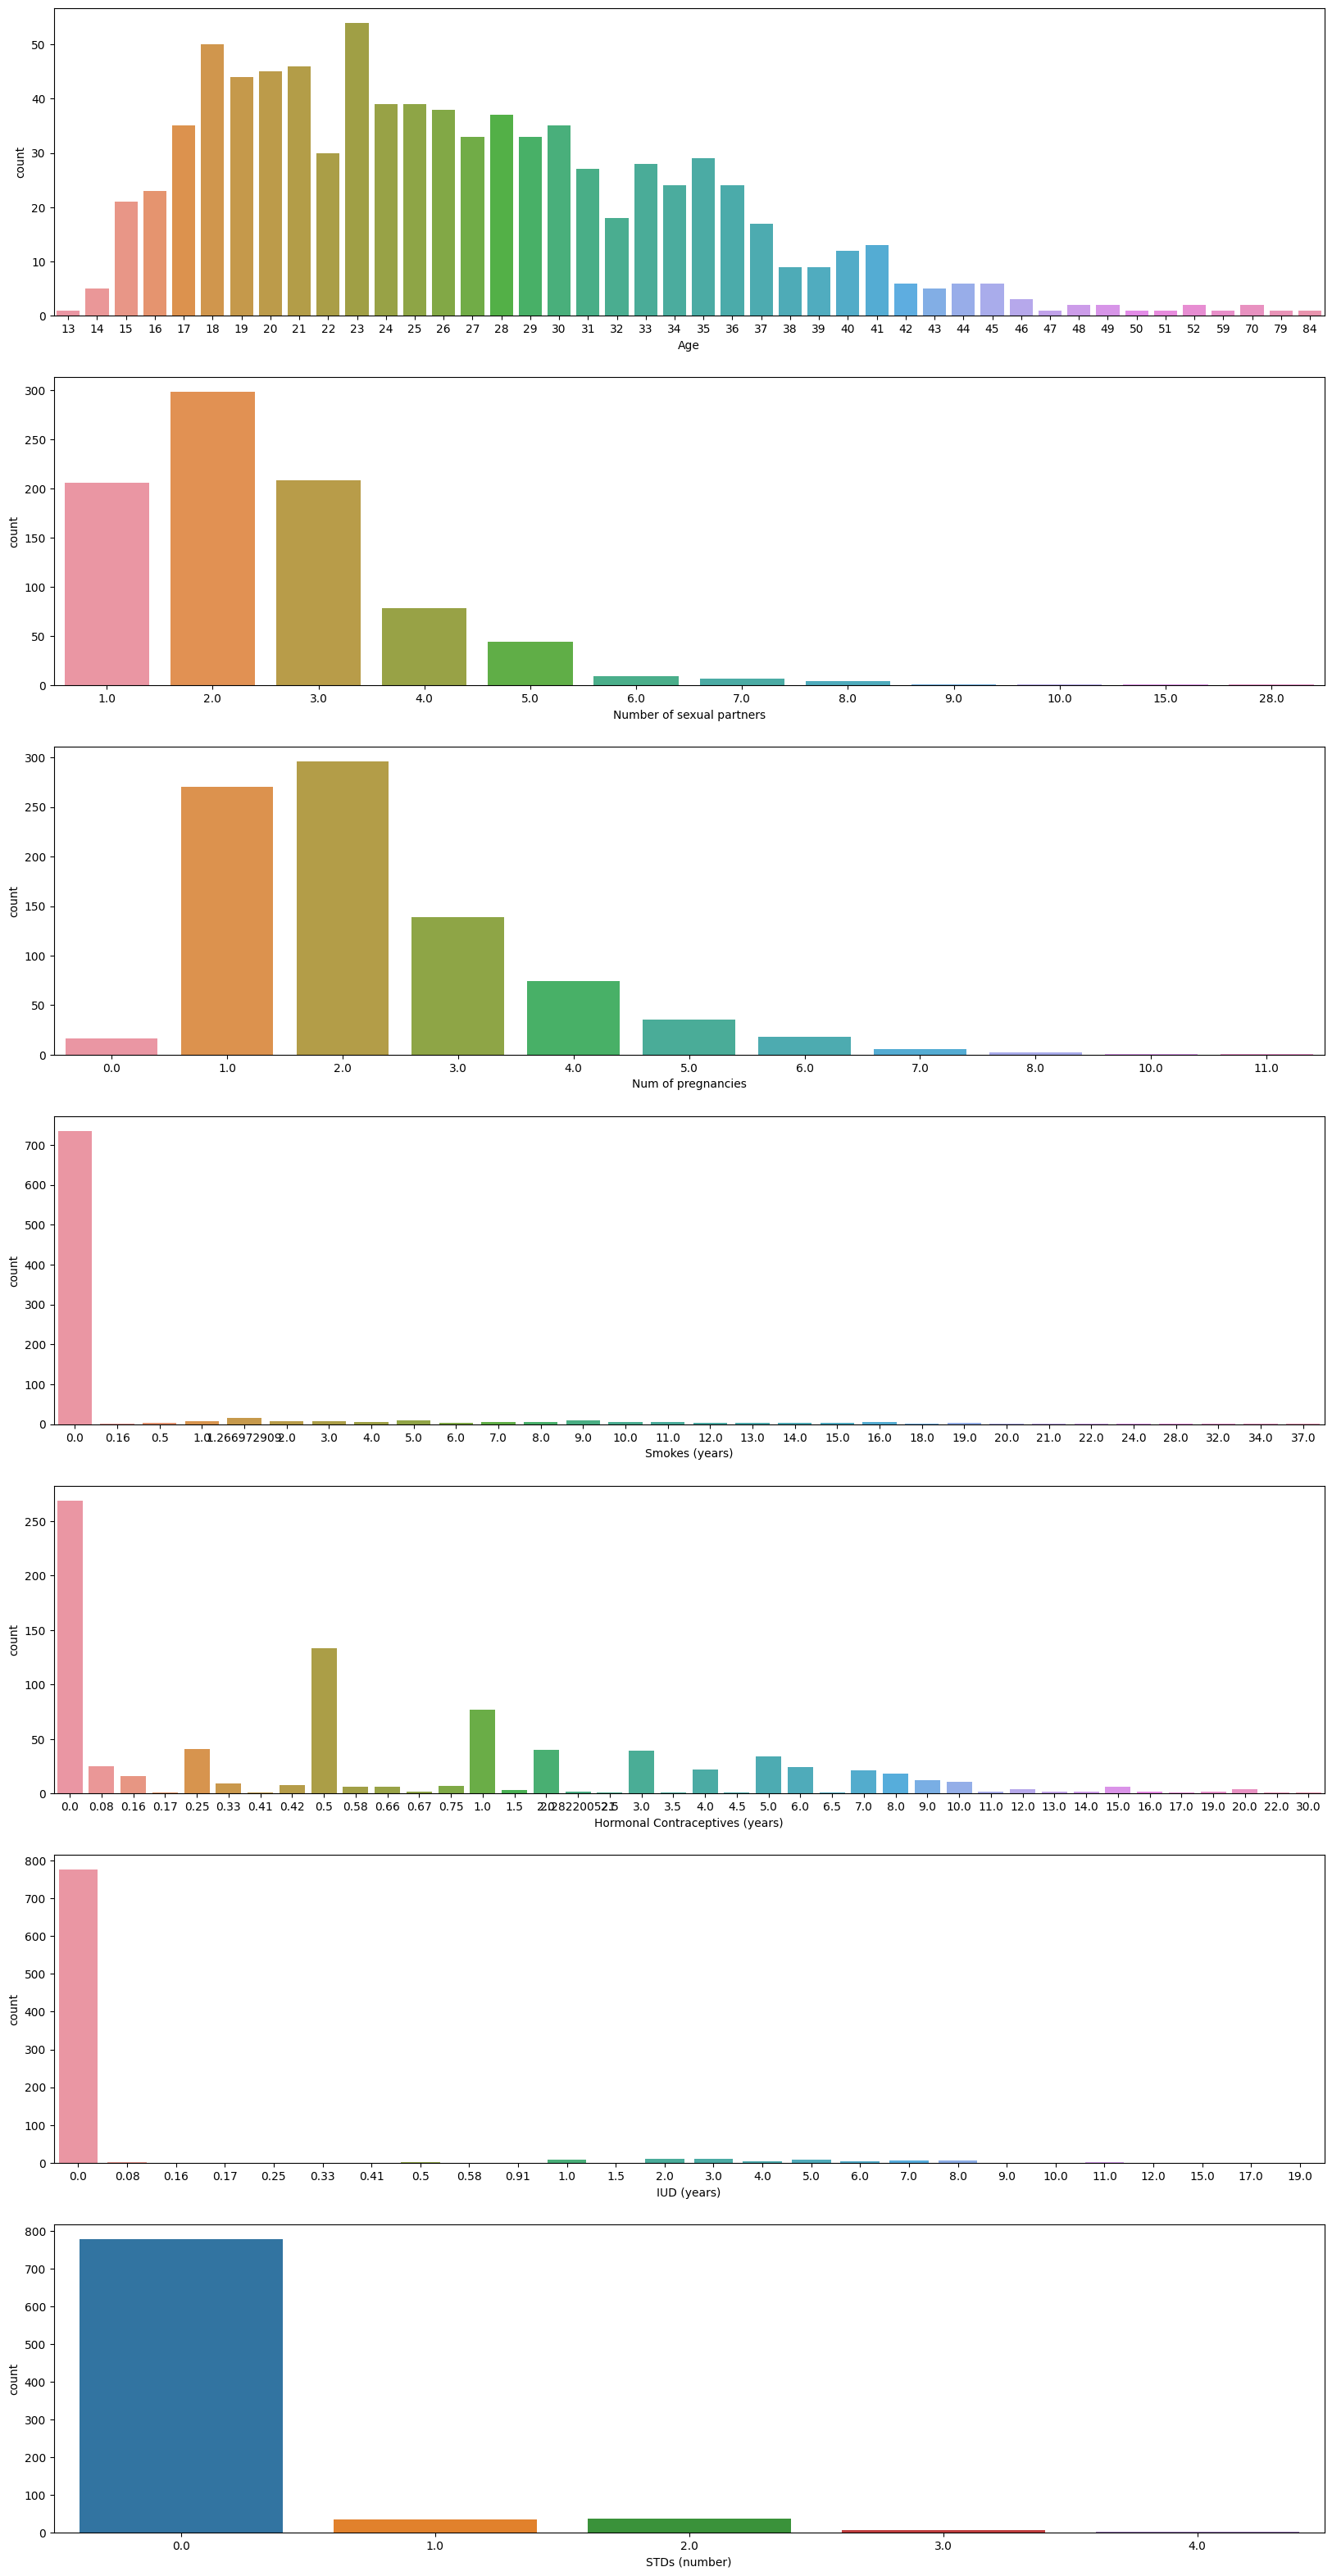

In [9]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=FirstData, ax=ax1)
sns.countplot(x='Number of sexual partners', data=FirstData, ax=ax2)
sns.countplot(x='Num of pregnancies', data=FirstData, ax=ax3)
sns.countplot(x='Smokes (years)', data=FirstData, ax=ax4)                             # 各種連續值欄位統計圖
sns.countplot(x='Hormonal Contraceptives (years)', data=FirstData, ax=ax5)
sns.countplot(x='IUD (years)', data=FirstData, ax=ax6)
sns.countplot(x='STDs (number)', data=FirstData, ax=ax7)

<AxesSubplot: xlabel='Hinselmann', ylabel='count'>

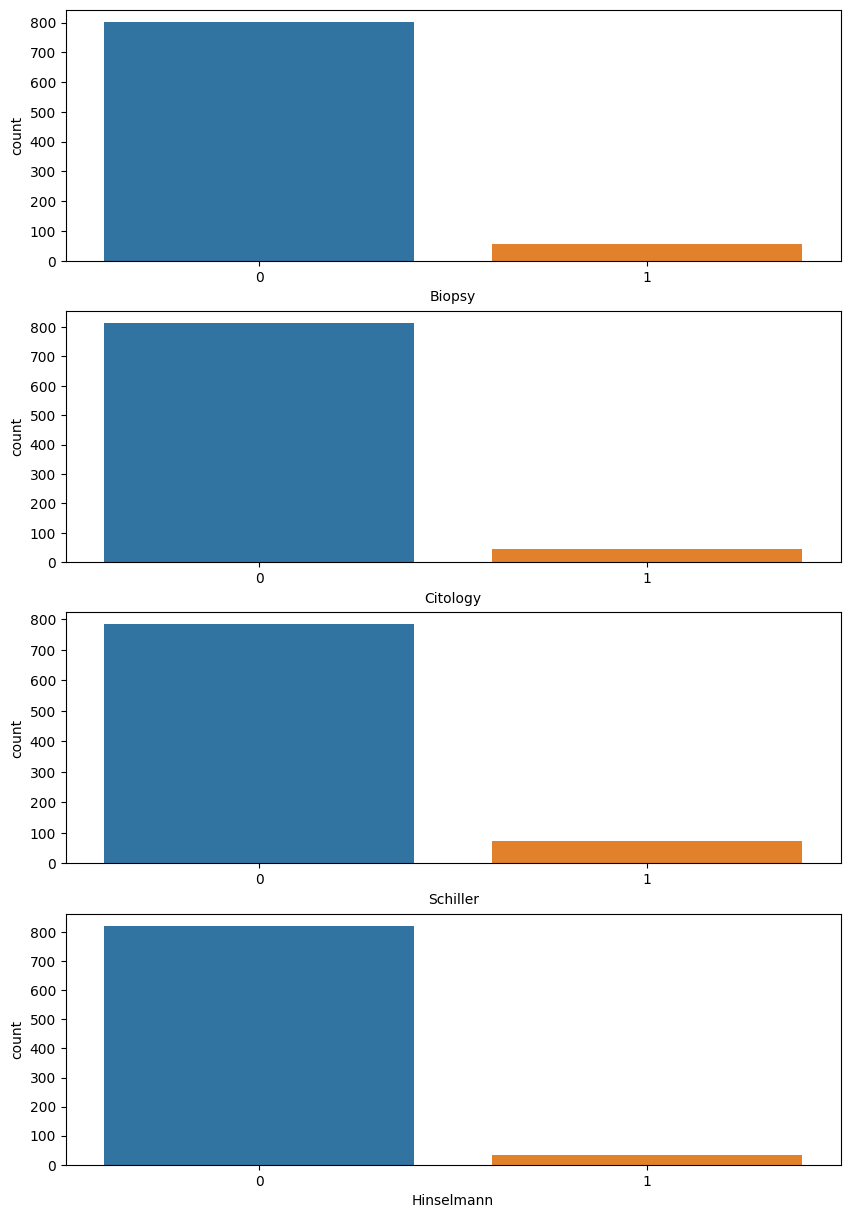

In [10]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,15))
sns.countplot(x='Biopsy', data=FirstData, ax=ax1)
sns.countplot(x='Citology', data=FirstData, ax=ax2)
sns.countplot(x='Schiller', data=FirstData, ax=ax3)                           # 癌症檢查結果統計圖
sns.countplot(x='Hinselmann', data=FirstData, ax=ax4)

In [11]:
TheWhole('Cancer',dxcancer)     ## 癌症病患數量

x = ['No_Cancer','Cancer']      ## 有沒有癌症數量統計圖
color = ['b','r']
h = [784,73]
#plt.bar(x,h,color = color)
FirstData.head()

Cancer :  73.0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy,Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


train_x = FirstData.drop(columns=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)',
                                 'Hormonal Contraceptives (years)','IUD (years)','STDs (number)','Hinselmann','Schiller','Citology','Dx:CIN','STDs:HIV','STDs:syphilis','Biopsy','Cancer','Dx:Cancer'])  
train_y = FirstData[["Biopsy"]]  #目標值

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state = 12)  # 劃分訓練集，測試集


# 模型建立
model_nb = GaussianNB()                        ## Naive bayes
model_nb.fit(X_train, Y_train)
# 預測
pred_nb = model_nb.predict(X_test)
# 衡量
print("正確率為", metrics.accuracy_score(Y_test, pred_nb))  
print('recall:',metrics.recall_score(Y_test, pred_nb))
print('precision:',metrics.precision_score(Y_test,pred_nb))
print('f1_score:',metrics.f1_score(Y_test, pred_nb))
print(confusion_matrix(Y_test, pred_nb))

正確率為 0.8883720930232558
recall: 0.3076923076923077
precision: 0.21052631578947367
f1_score: 0.25
[[187  15]
 [  9   4]]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
train_x = FirstData.drop(columns=['STDs:condylomatosis','STDs:vulvo-perineal condylomatosis','Hinselmann','Schiller','Citology','Dx:CIN','STDs:HIV','STDs:syphilis','Biopsy','Cancer','Dx:Cancer'])   #刪除沒用特徵，保留特徵值
train_y = FirstData[["Biopsy"]]  #目標值

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.33, random_state = 12)  # 劃分訓練集，測試集
train_x.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),Dx:HPV
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,1
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


model = KNeighborsClassifier(n_neighbors=10)                                            # KNN Model 
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("使用KNN正確率為:", metrics.accuracy_score(yyyyy, Y_test))

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))


使用KNN正確率為: 0.9295774647887324
正確率為 0.9295774647887324
recall: 0.0
precision: 0.0
f1_score: 0.0
[[264   0]
 [ 20   0]]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.tree import plot_tree

model0 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 10 )   # Entropy node Decision tree
model0.fit(X_train, Y_train)
yyyyy = model0.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))


正確率為 0.9119718309859155
recall: 0.0
precision: 0.0
f1_score: 0.0
[[259   5]
 [ 20   0]]


In [16]:
model = DecisionTreeClassifier(criterion="entropy", max_depth= 7)   # Entropy depth Decision tree
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9119718309859155
recall: 0.05
precision: 0.14285714285714285
f1_score: 0.07407407407407408
[[258   6]
 [ 19   1]]


In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize = (15,15))
plot_tree(model, class_names=FirstData['Biopsy'])

In [18]:
model1 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes= 10)   # gini node Decision tree
model1.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9119718309859155
recall: 0.05
precision: 0.14285714285714285
f1_score: 0.07407407407407408
[[258   6]
 [ 19   1]]


[Text(0.6, 0.9375, 'X[13] <= 0.5\nentropy = 0.403\nsamples = 574\nvalue = [528, 46]\nclass = C'),
 Text(0.5, 0.8125, 'X[8] <= 8.5\nentropy = 0.368\nsamples = 567\nvalue = [527, 40]\nclass = C'),
 Text(0.2, 0.6875, 'X[12] <= 1.5\nentropy = 0.328\nsamples = 533\nvalue = [501, 32]\nclass = C'),
 Text(0.1, 0.5625, 'entropy = 0.286\nsamples = 500\nvalue = [475, 25]\nclass = C'),
 Text(0.3, 0.5625, 'X[8] <= 2.5\nentropy = 0.746\nsamples = 33\nvalue = [26, 7]\nclass = C'),
 Text(0.2, 0.4375, 'entropy = 0.871\nsamples = 24\nvalue = [17, 7]\nclass = C'),
 Text(0.4, 0.4375, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = C'),
 Text(0.8, 0.6875, 'X[0] <= 46.5\nentropy = 0.787\nsamples = 34\nvalue = [26, 8]\nclass = C'),
 Text(0.7, 0.5625, 'X[0] <= 39.0\nentropy = 0.696\nsamples = 32\nvalue = [26, 6]\nclass = C'),
 Text(0.6, 0.4375, 'X[10] <= 2.5\nentropy = 0.828\nsamples = 23\nvalue = [17, 6]\nclass = C'),
 Text(0.5, 0.3125, 'X[8] <= 13.0\nentropy = 0.702\nsamples = 21\nvalue = [17, 4]\nclas

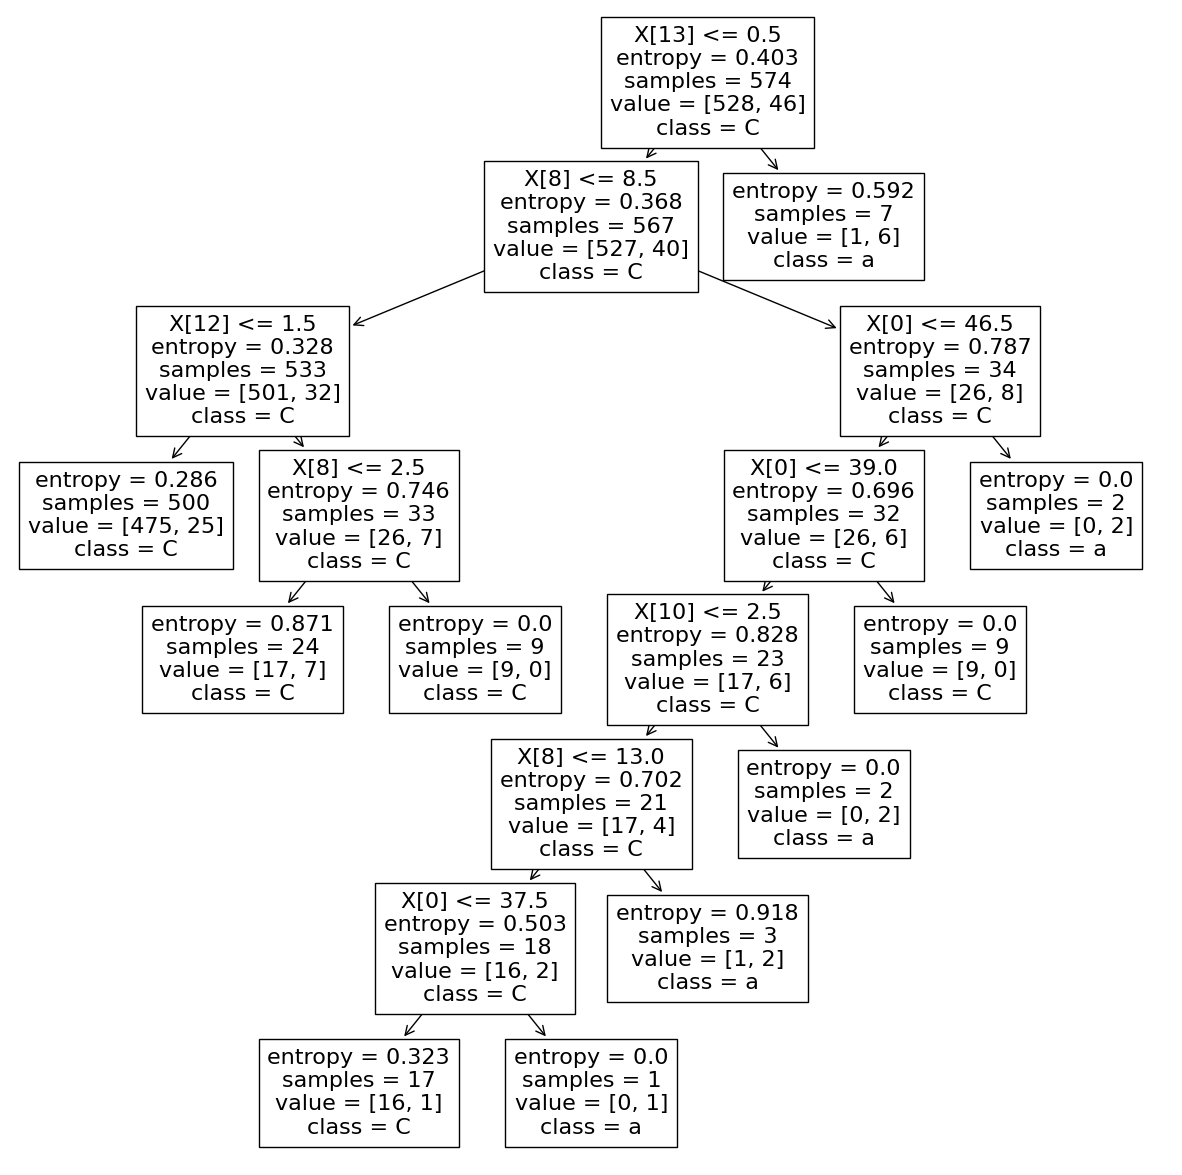

In [ ]:
from sklearn.tree import plot_tree
FirstData['Cancer'] = FirstData['Cancer'].astype(str)

fig, ax = plt.subplots(figsize = (15,15))
plot_tree(model0, class_names='Cancer')

In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth= 5)   # gini depth Decision tree, depth = 5 模型最好
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9225352112676056
recall: 0.3333333333333333
precision: 0.6923076923076923
f1_score: 0.45
[[253   4]
 [ 18   9]]


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = RandomForestClassifier(criterion="entropy", max_leaf_nodes= 30)   
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

C:\Users\user\AppData\Local\Temp\ipykernel_17680\3911779878.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


正確率為 0.9295774647887324
recall: 0.2962962962962963
precision: 0.8888888888888888
f1_score: 0.4444444444444444
[[256   1]
 [ 19   8]]


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_train, Y_train)   ##  分析與計算欄位權重值，找出影響力大的欄位

permumtation_impor = PermutationImportance(random_forest, random_state=2019).fit(X_test, Y_test)
eli5.show_weights(permumtation_impor, feature_names = X_test.columns.tolist())

C:\Users\user\AppData\Local\Temp\ipykernel_14444\2572413434.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_train, Y_train)   ##  分析與計算欄位權重值，找出影響力大的欄位


Weight,Feature
0.0614 ± 0.0199,Dx:HPV
0.0140 ± 0.0156,Num of pregnancies
0.0084 ± 0.0108,Hormonal Contraceptives (years)
0.0056 ± 0.0037,Age
0.0047 ± 0.0000,Number of sexual partners
0.0037 ± 0.0123,Hormonal Contraceptives
0.0028 ± 0.0046,First sexual intercourse
0.0009 ± 0.0037,STDs
0.0009 ± 0.0037,Smokes (years)
0 ± 0.0000,STDs (number)


In [ ]:
Data_0 = FirstData[FirstData.Cancer == 1]                       # Cancer欄位為1的Dataframe
Data_0.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy,Cancer
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.00,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,1,1
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0,0,0,0,1,1,1,1
23,40,1.0,20.0,2.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,1,0,1,1


In [ ]:
CancerData = pd.read_csv("00001.csv", thousands=",")    # 做出一個所有罹患癌症的人的csv檔          
CancerData.head()

FileNotFoundError: [Errno 2] No such file or directory: '00001.csv'

Cancer :  73.0
Smokes :  12.0
Hormonal Contraceptives :  48.0
IUD :  14.0
STDs:condylomatosis :  8.0
STDs:vulvo-perineal condylomatosis :  8.0
STDs:syphilis :  1.0
STDs:HIV :  6.0
Dx:CIN :  1.0
Dx:HPV :  16.0
STDs :  14.0


<BarContainer object of 10 artists>

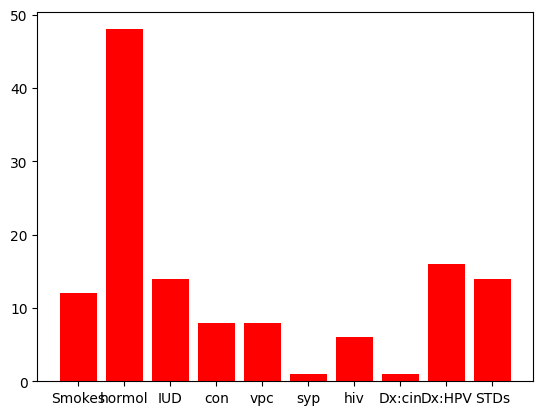

In [ ]:

def TheWhole(name='', num = 0.0) : 
  for i in range(len(CancerData)) : 
    if CancerData[name][i] == 1 : 
       num = num + 1.0
    i = i + 1 

  print(name,': ',num)                                            ## 計算統計罹患癌症的人各項檢查陽性數量，找出影響力最大的特徵

TheWhole("Cancer",numOfsmoke)                         
TheWhole("Smokes",numOfsmoke)                         
TheWhole('Hormonal Contraceptives',numOfhormol)
TheWhole('IUD',numOfIUD)
TheWhole('STDs:condylomatosis',numOfcon)
TheWhole('STDs:vulvo-perineal condylomatosis',numOfvpc)
TheWhole('STDs:syphilis',numOfsyp)
TheWhole('STDs:HIV',numOfhiv)
TheWhole('Dx:CIN',dx0)
TheWhole('Dx:HPV',dx1)
TheWhole('STDs',dxstd)

x = ['Smokes','hormol','IUD','con','vpc','syp','hiv','Dx:cin','Dx:HPV','STDs']      # 各種離散( 0,1 )型陽性統計圖 
color = ['r','r','r','r','r','r','r','r','r','r']
h = [12,48,14,8,8,1,6,1,16,14]
plt.bar(x,h,color = color)

<AxesSubplot: xlabel='STDs (number)', ylabel='count'>

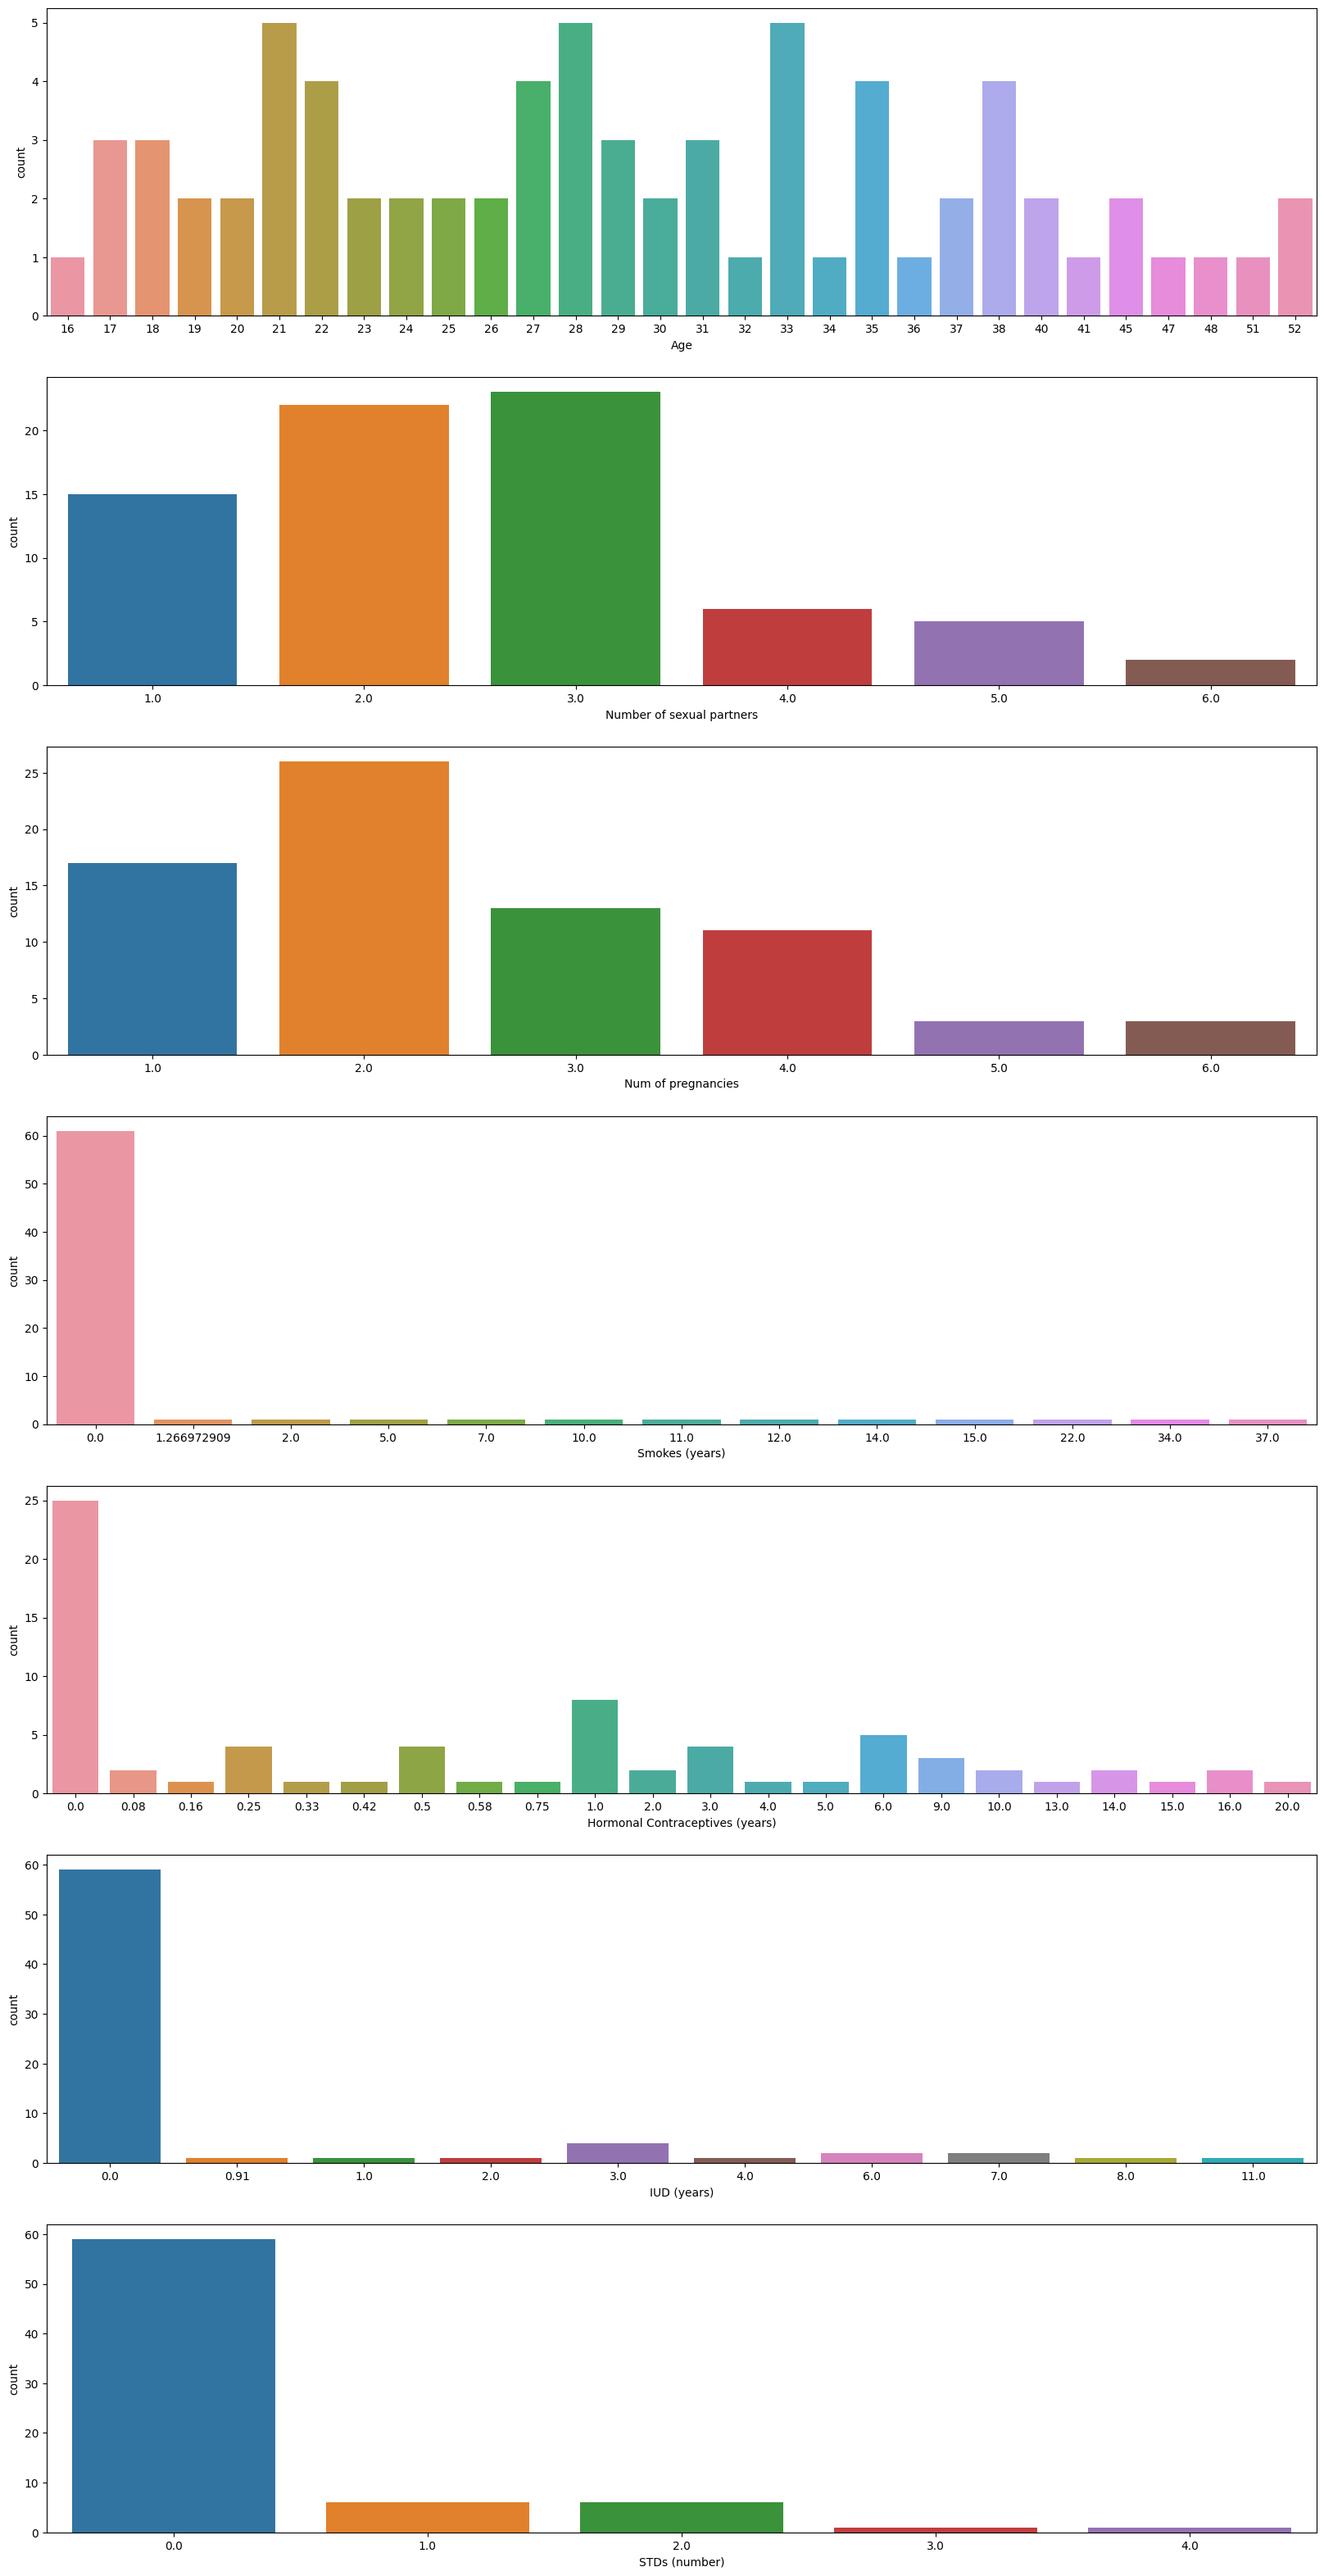

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=Data_0, ax=ax1)
sns.countplot(x='Number of sexual partners', data=Data_0, ax=ax2)
sns.countplot(x='Num of pregnancies', data=Data_0, ax=ax3)                        ## 罹患癌症的人連續特徵值的統計圖
sns.countplot(x='Smokes (years)', data=Data_0, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=Data_0, ax=ax5)
sns.countplot(x='IUD (years)', data=Data_0, ax=ax6)
sns.countplot(x='STDs (number)', data=Data_0, ax=ax7)